You work in XYZ Company as a Python Data Scientist. The company officials have collected some data on 
Health parameter based on Diabetes and wish for you to create a model from it
1. Load the dataset using pandas 
2. Extract data fromOutcome column is a variable named Y 
3. Extract data from every column except Outcome column in a variable named X 
4. Divide the dataset into two parts for training and testing in 70% and 30% proportion 
5. Create and train Logistic Regression Model on training set 
6. Make predictions based on the testing set using the trained model 
7. Check the performance by calculating the confusion matrix and accuracy score of the model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
col_list=df.columns

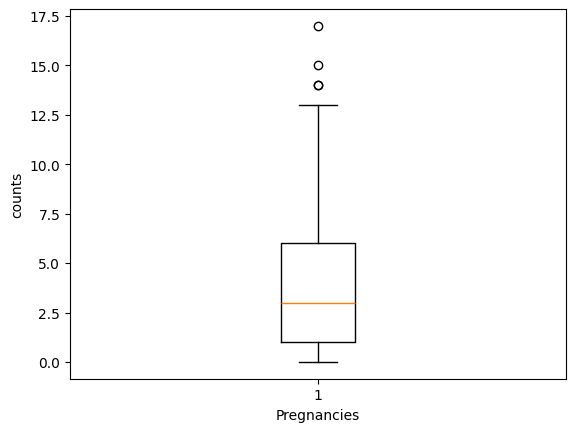

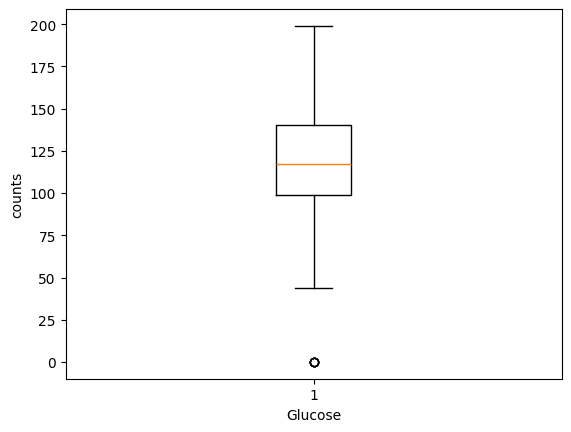

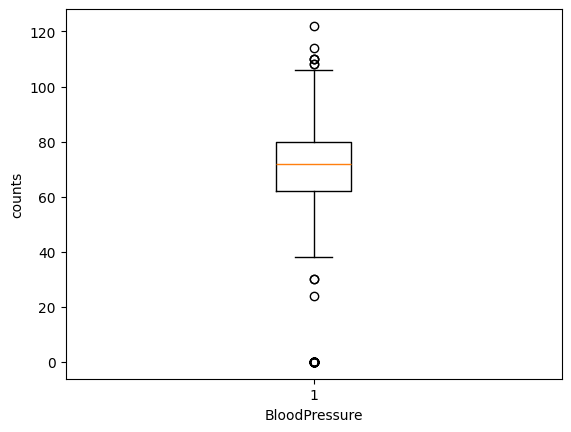

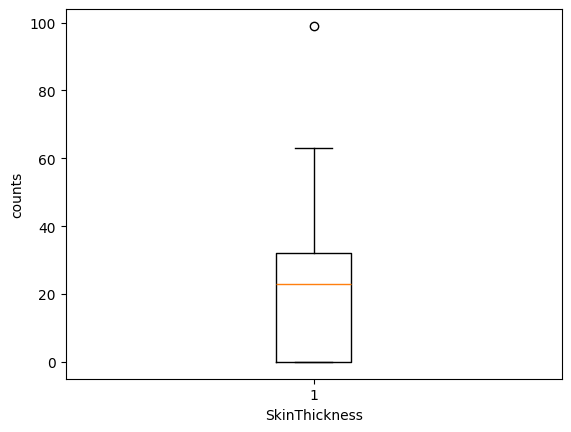

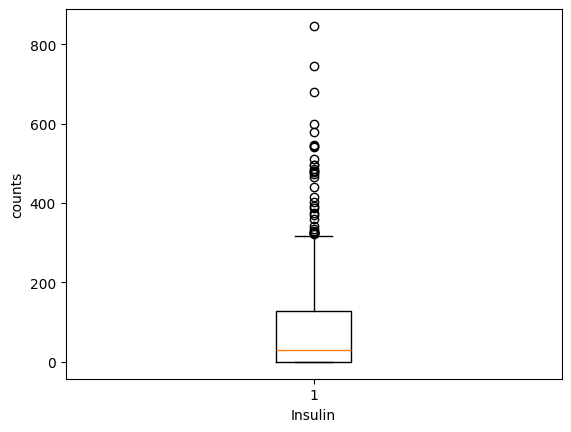

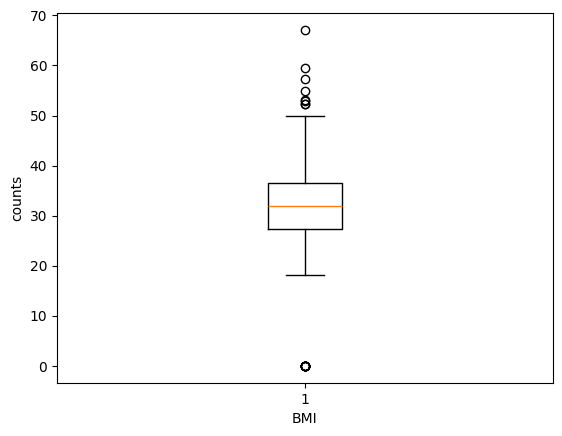

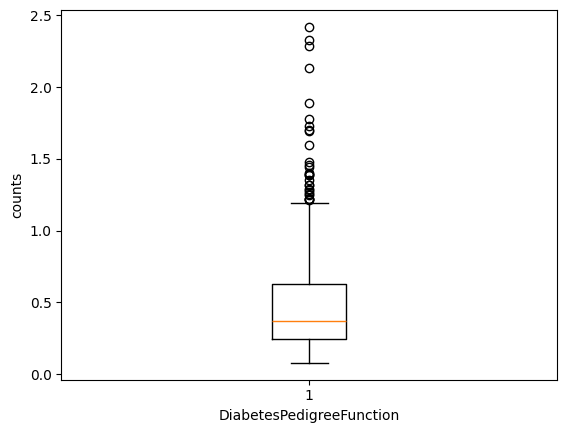

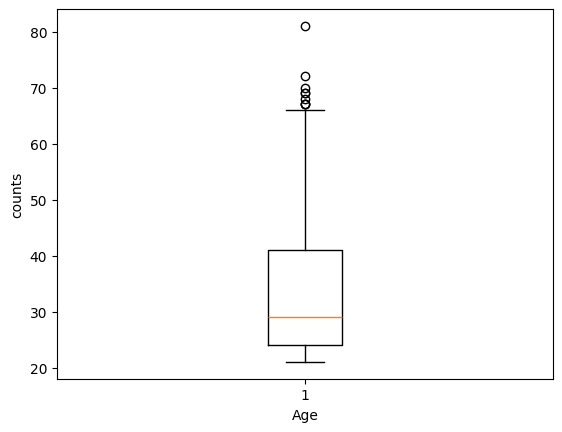

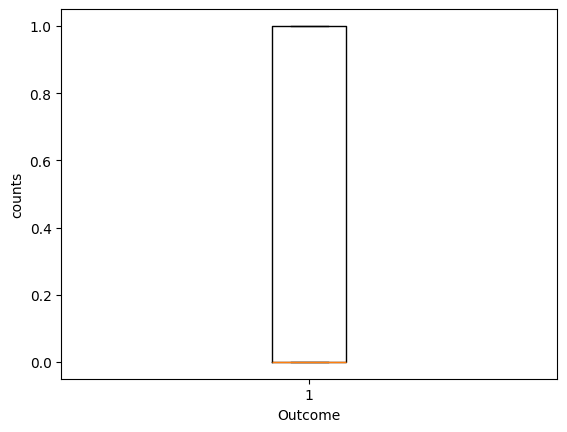

In [9]:
for i in col_list:
    if (df[i].dtypes!="object"):
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel("counts")
        plt.show()

In [10]:
col_list

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
outlist=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
for i in outlist:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    df=df[(df[i]>=Q1-1.5*IQR) & (df[i]<=Q3+1.5*IQR)]

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(636, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


In [16]:
x=df.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 636, dtype: int64

In [18]:
#feature selection

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [20]:
lr=LogisticRegression()

In [22]:
rfe=RFE(lr,n_features_to_select=5)
rfe.fit(x,y)

C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [23]:
selected_indices=[ i for i, selected in enumerate(rfe.support_) if selected]
selected_indices


[0, 1, 5, 6, 7]

In [24]:
columns_name=x.columns

In [27]:
selected_column_names=[columns_name[i] for i in selected_indices]

In [29]:
selected_column_names

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [30]:
x=x.loc[:,['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [31]:
x

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
5,5,116,25.6,0.201,30
...,...,...,...,...,...
763,10,101,32.9,0.171,63
764,2,122,36.8,0.340,27
765,5,121,26.2,0.245,30
766,1,126,30.1,0.349,47


In [32]:
#model selection

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
lr=LogisticRegression()

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [40]:
accuracy_score(y_pred,y_test)

0.7696335078534031

In [42]:
confusion_matrix(y_pred, y_test)

array([[115,  26],
       [ 18,  32]], dtype=int64)